Задание 1, Эмпирический анализ временной сложности алгоритмов
Исп, Бочаров А.М.
1.Генерация n-мерного вектора

In [1]:
import numpy as np
import pandas as pd
import time  #to measure time
import random
import seaborn as sns  #for plots

In [14]:
list_int = [i for i in range (2000)]  #list for circle
list_time = []  #list with time correcponing list_int size of vector

for i in list_int:
  time_start = time.time()
  for _ in range(5):  #generat 5 times
    data = [100 for i in range(i)]
  time_stop = time.time()
  list_time.append((time_stop - time_start)/5)
len(list_time)


2000

In [15]:
#create dataframe
df = pd.DataFrame(list_int,
                  columns=['size of vector'])
df['time of vector building(const)'] = list_time
df.head(10)

,size of vector,time of vector building(const)
0,0,0.000002
1,1,0.000001
2,2,0.000001
3,3,0.000001
4,4,0.000001
5,5,0.000001
6,6,0.000001
7,7,0.000001
8,8,0.000001
9,9,0.000001


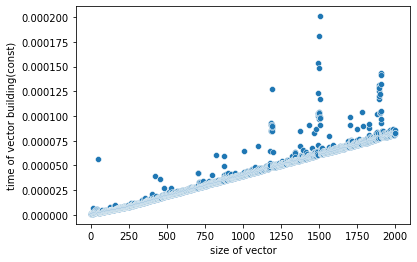

In [16]:
plot = sns.scatterplot(data=df,x='size of vector',y='time of vector building(const)')
fig = plot.get_figure()
fig.savefig('const_v_1.png')
fig.show()
#sns.scatterplot(data=df,x='size of vector',y='time of vector building(const)')


In [17]:
!ls

const_v_1.png  const_v.png  sample_data


In [19]:
from google.colab import files

files.download('const_v_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Зависимость похожа на линейную, что согласуется с теорией

In [21]:
#sum of elements
list_time_square = []  #list with time correcponing list_int size of vector

for i in list_int:
  time_start = time.time()
  for _ in range(5):  #generat 5 times
    data = [(lambda i: i)(i) for i in range(i)]
    for k in range(i):
      data[k] = sum(data[0:k])
  
  time_stop = time.time()
  list_time_square.append((time_stop - time_start)/5)
len(list_time_square)

2000

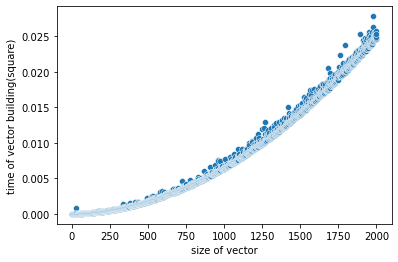

In [23]:
df['time of vector building(square)'] = list_time_square
plot = sns.scatterplot(data=df,x='size of vector',y='time of vector building(square)')
fig = plot.get_figure()
fig.savefig('square_v_1.png')
fig.show()

In [24]:
!ls

const_v_1.png  const_v.png  sample_data  square_v_1.png


In [25]:
from google.colab import files

files.download('square_v_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Зависимость похожа на квадратичную, что согласуется с теорией

In [27]:
#mult of elements
list_time_mult = []  #list with time correcponing list_int size of vector

for i in list_int:
  time_start = time.time()
  for _ in range(5):  #generat 5 times
    #data = [(lambda i: i)(i) for i in range(i)]
    data = [(lambda i: random.randint(1,10))(i) for i in range(i)]
    for k in range(i):
      mult = 1
      for m in range(k):
        mult *=data[m]
      data[k] = mult
  
  time_stop = time.time()
  list_time_mult.append((time_stop - time_start)/5)
len(list_time_mult)

2000

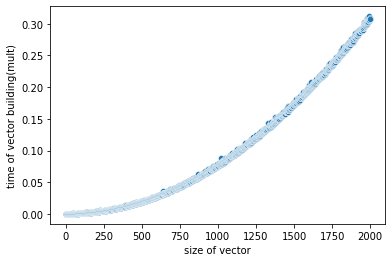

In [28]:
df['time of vector building(mult)'] = list_time_mult
plot = sns.scatterplot(data=df,x='size of vector',y='time of vector building(mult)')
fig = plot.get_figure()
fig.savefig('mult_v_1.png')
fig.show()

In [29]:
from google.colab import files

files.download('mult_v_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Зависимость похожа на квадратичную, что согласуется с теорией

Положим, что list_int содержит коэффициенты многочлена и вычислим значение Р(1,5) путем прямого вычисления

In [32]:
x = 100
data = [(lambda i: random.randint(1,10))(i) for i in range(2000)]

time_start = time.time()
for i in range(5):
  summa = 0  #for result
  for j in range(2000):
    summa +=data[j]*(x**j)
time_stop = time.time()
print('время прямого вычисления = {:.7f}'.format((time_stop-time_start)/5))

время прямого вычисления = 0.0351040


In [33]:
x = 100

time_start = time.time()
for _ in range(5):
  summa = data[1999]
  for i in range(1998,-1,-1):
    
    summa =  data[i-1] + x * summa
time_stop = time.time()
print('время вычисления по схеме Горнера = {:.7f}'.format((time_stop-time_start)/5))

время вычисления по схеме Горнера = 0.0015918


По полученным вычислениям схема Горнера медленнее, но по идее она должна быть быстрее. так как в ней нет дорогой операции возведения в степень. Это скорее всего связано с тем. что в Питоне очень медленные циклы.

In [34]:
#сортировка пузырьком
list_time_bubble = []  #list with time correcponing list_int size of vector

for i in list_int:
  time_start = time.time()
  for _ in range(5):  #generat 5 times
    #data = [(lambda i: i)(i) for i in range(i)]
    a = []
    for m in range(i):  #generate random list
      a.append(random.randint(1, 100))
 
    for k in range(i-1):
      for l in range(i-k-1):
          if a[l] > a[l+1]:
              a[l], a[l+1] = a[l+1], a[l]
     
  time_stop = time.time()
  list_time_bubble.append((time_stop - time_start)/5)
len(list_time_bubble)

 


2000

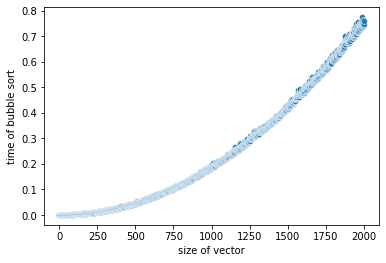

In [35]:
df['time of bubble sort'] = list_time_bubble
plot = sns.scatterplot(data=df,x='size of vector',y='time of bubble sort')

fig = plot.get_figure()
fig.savefig('bubble_v_1.png')
fig.show()

In [36]:
from google.colab import files

files.download('bubble_v_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Зависимость похожа на квадратичную, что согласуется с теорией

In [37]:
def quicksort(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n < q:
               s_nums.append(n)
           elif n > q:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return quicksort(s_nums) + e_nums + quicksort(m_nums)

In [38]:
#быстрая сортировка
list_time_quick = []  #list with time correcponing list_int size of vector

for i in list_int:
  time_start = time.time()
  for _ in range(5):  #generat 5 times
    data = [(lambda i: random.randint(1,10))(i) for i in range(2000)]
    quicksort(data)
     
  time_stop = time.time()
  list_time_quick.append((time_stop - time_start)/5)
len(list_time_quick)

2000

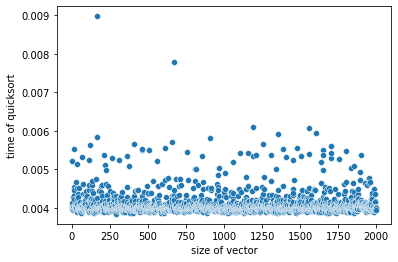

In [39]:
df['time of quicksort'] = list_time_quick
plot = sns.scatterplot(data=df,x='size of vector',y='time of quicksort')
fig = plot.get_figure()
fig.savefig('quick_v_1.png')
fig.show()

In [40]:
from google.colab import files

files.download('quick_v_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
#сортировка timsort
list_time_tim = []  #list with time correcponing list_int size of vector

for i in list_int:
  time_start = time.time()
  for _ in range(5):  #generat 5 times
    data = [(lambda j: random.randint(1,100))(j) for j in range(i)]
 
    data.sort()  #standart realisation the quickest sorting
     
  time_stop = time.time()
  list_time_tim.append((time_stop - time_start)/5)
len(list_time_tim)

2000

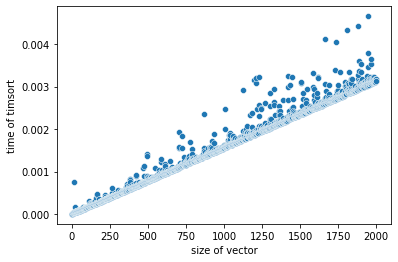

In [44]:
df['time of timsort'] = list_time_tim
plot = sns.scatterplot(data=df,x='size of vector',y='time of timsort')
fig = plot.get_figure()
fig.savefig('tim_v_1.png')
fig.show()

In [45]:
from google.colab import files

files.download('tim_v_1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

timsort самая быстрая сортировка

In [46]:
#2. Создание матриц и их умножение
N = 1000   #size of square matrix
m = [random.randint(1,12) for i in range(N*N)]
m = np.array(m).reshape(N,N)
print('Matrix is:\n', m)

Matrix is:
 [[12  3  5 ... 10 10  4]
 [11  7  3 ...  3  8 11]
 [ 4  2  7 ... 11  1 12]
 ...
 [ 8  6  3 ... 12 10  8]
 [ 5  3  6 ...  7  5  8]
 [ 8  5  3 ... 12 12 11]]


In [47]:
m2 = [random.randint(1,12) for i in range(N*N)]
m2 = np.array(m).reshape(N,N)
print('Matrix is:\n', m2)
matrix = m.dot(m2)
print('Matrix is:\n', matrix)

Matrix is:
 [[12  3  5 ... 10 10  4]
 [11  7  3 ...  3  8 11]
 [ 4  2  7 ... 11  1 12]
 ...
 [ 8  6  3 ... 12 10  8]
 [ 5  3  6 ...  7  5  8]
 [ 8  5  3 ... 12 12 11]]
Matrix is:
 [[42961 43550 41491 ... 43013 39543 43191]
 [43582 44505 42360 ... 43094 40291 43632]
 [42288 42958 41292 ... 42041 39658 42852]
 ...
 [43361 44692 41745 ... 43596 40982 43399]
 [43453 43309 41715 ... 42759 41136 43447]
 [42881 44175 42001 ... 42693 40308 43164]]


3. При реализации алгориммов в данном ноутбуке чаще всего использовалась структура данных - изменяемый массив list он очень удобен для представления данных в виде некоторого списка, элементы которого можно изменять и модифицировать
исп Бочаров АМ skype bam271074 группа 4101
исходный код есть на гитхабе
https://github.com/Murzik2020ai/algo
 